
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true" alt="esquema" />
</div>


# Proyecto Clustering y Modelos de Regresión

En este proyecto, asumirás el rol de **cientifico de datos en una empresa de comercio global**. La compañía busca comprender mejor su base de clientes, productos y operaciones para tomar decisiones informadas que maximicen el beneficio y optimicen sus procesos. 

Trabajarás con un conjunto de datos del comercio global que incluye información sobre ventas, envíos, costos y beneficios a nivel de cliente y producto. Tu tarea será segmentar los datos mediante **clustering** y luego diseñar modelos de **regresión** específicos para cada segmento, lo que permitirá obtener insights personalizados sobre los factores que influyen en el éxito de la compañía.


## Objetivo del Proyecto

La empresa tiene las siguientes preguntas clave:

1. **¿Cómo podemos agrupar a los clientes o productos de manera significativa?**

   - Por ejemplo, identificar clientes según su comportamiento de compra o productos según su rentabilidad.

2. **¿Qué factores son más relevantes para predecir el beneficio o las ventas dentro de cada grupo?**

   - Esto ayudará a diseñar estrategias específicas de marketing, optimizar precios o ajustar políticas de descuento.

3. **¿Cómo podemos utilizar estos *insights* para tomar decisiones estratégicas?**

   - Por ejemplo, enfocarse en los segmentos más rentables o intervenir en los menos rentables.

Para contestar estas preguntas, el objetivo en este proyecto es realizar: 

1. **Clustering**: Realizar un análisis de segmentación para agrupar clientes o productos según características clave, las cuales deberás elegir personalmente además de justificar el porque de su elección.

2. **Regresión por Segmentos**: Diseñar modelos de predicción para cada segmento, explicando las relaciones entre variables, intentando predecir el total de ventas en cada uno de los segmentos. 

## Estructura del Proyecto

1. **Preparación de los Datos**:

   - **Carga de datos**: Familiarízate con las variables incluidas en el conjunto de datos (por ejemplo, ventas, costo de envío, beneficio, categoría de productos).

   - **Limpieza de datos**: Maneja valores faltantes, elimina duplicados y identifica y trata *outliers*.

   - **Transformaciones**: Normaliza variables numéricas y codifica variables categóricas si es necesario.

2. **Clustering**:

   - **Elección de variables**: Selecciona atributos clave para agrupar a los tipos de ventas que hacemos como empresa (por ejemplo, `Sales`, `Profit`, `Discount`, `Shipping Cost`).

   - **Escalado**: Normaliza las variables para evitar que algunas dominen sobre otras.

   - **Método de clustering**: Aplica algoritmos como K-means, clustering jerárquico o DBSCAN.

   - **Evaluación**: Determina el número óptimo de clusters usando técnicas como el método del codo o el coeficiente de silueta.

   - **Interpretación**: Analiza los clusters resultantes e interpreta su significado en términos de comportamiento del negocio.


3. **Modelos de Regresión por Clusters**:

   - **Variable objetivo**: Define una métrica clave para predecir (por ejemplo, `Sales`).

   - **Segmentación**: Ajusta un modelo de regresión para cada cluster, utilizando las variables disponibles.

   - **Evaluación**: Evalúa el desempeño de los modelos usando métricas como R², MAE o RMSE.

   - **Comparación entre clusters**: Identifica diferencias en los factores clave que impactan el beneficio en cada grupo.

4. **Entrega de Insights**:

   - Responde preguntas del negocio basándote en los resultados del clustering y los modelos de regresión.

   - Propón recomendaciones accionables para la empresa.


## Como Entregar el Proyecto

La entrega del proyecto se realizará a través de una **issue en GitHub**, trabajando en un repositorio propio en tu cuenta personal. Los pasos que deberás seguir para hacer la entrega del proyecto son:


- **Crear un nuevo repositorio en tu cuenta de GitHub:**

   - Crea un nuevo repositorio llamado `Proyecto9-NombreProyecto`. Este nombre es obligatorio, no podremos llamarlo de otra forma. 

   - Configuralo como público. 


- **Desarrolla el proyecto:**

   - Implementa el código para la resolución del problema.

   - Recuerda hacer commits regulares mientras avanzas en el desarrollo:

     ```bash
     git add .
     git commit -m "Descripción del avance"
     git push
     ```


- **Crear una issue en el repositorio original del curso:**

   - Ve al repositorio original del curso y dirígete a la pestaña de **Issues**.

- **Abrir una nueva issue para tu entrega:**

   - Haz clic en **New Issue** y llena los siguientes campos:

     - **Título:** Usa el formato "Entrega Proyecto: ProyectoXXXX - [Tu Nombre]".

     - **Descripción:** En la descripción, incluye:

       - Una breve explicación de tu proyecto.

       - Instrucciones para ejecutar tu código (si aplica).

       - Un enlace a tu repositorio personal donde está alojado el proyecto.


## 🚀 Entrega del Proyecto 🚀

**Fecha y hora límite:**

🗓️ **Lunes a las 9:00 AM.**


**Nota importante:**

⚠️ **Todos los proyectos que sean entregados o modificados después de la hora límite (lunes a las 9:00 AM) se considerarán como no entregados.** Por favor, asegúrate de completar y enviar tu trabajo a tiempo para evitar problemas.


# 🎤 Presentación de Proyectos 🎤

El lunes tendremos las **presentaciones de los proyectos**. La dinámica será la siguiente:

- De forma **aleatoria**, seleccionaremos entre **3 y 5 alumnos** para presentar su proyecto.

- Cada alumno tendrá **5 minutos** para explicar su proyecto y hacer una demo en vivo. Durante este tiempo podrán mostrar cómo funciona su juego y resaltar las características principales.

**Detalles importantes:**

- Es importante que lleguéis puntuales, ya que comenzaremos las presentaciones de inmediato.

- Asegúrate de que tu código esté listo y funcional para la demo.

- Todos debemos estar preparados para presentar, ya que la selección será completamente aleatoria.


Frente a reto planteado, emplearemos dos approachs diferentes:

- Segmentar a clientes según "Ventas". Veremos qué condiciona las ventas y usaremos esta columna como variable respuesta. 
- Segmentar a clientes por "Región". De esta forma podremos crear insights más personalizados

In [1]:
import pandas as pd
import numpy as np
from src import soporte_clustering as s_clustering, soporte_eda_y_outliers as s_eda, soporte_encoding as s_encoding, soporte_tests_y_encoding as s_tests, soporte_scaling as s_estandarizacion

import seaborn as sns
import matplotlib.pyplot as plt 
import math



In [2]:
df = pd.read_pickle("datos/df_investigado")

Para nuestra primera aproximación, Tomaremos las columnas relevantes para ventas. Estas son:
- Fecha de pedido
- Fecha de entrega
- Forma de entrega
- Segmento
- Mercado
- Subcategoría
- Ventas
- Cantidad 
- Descuento
- Beneficio
- Coste de envío
- Prioridad

In [3]:
df_ventas = df[["Order_Date","Ship_Date","Ship_Mode","Segment","Market","Sub-Category","Product_Name","Sales","Quantity","Discount","Profit","Shipping_Cost","Order_Priority"]]

In [4]:
df_ventas.head()

,Order_Date,Ship_Date,Ship_Mode,Segment,Market,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,2012-07-31,2012-07-31,Same Day,Consumer,US,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,Corporate,APAC,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,Consumer,APAC,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,2013-01-28,2013-01-30,First Class,Home Office,EU,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,2013-11-05,2013-11-06,Same Day,Consumer,Africa,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# ENCODING

Para realizar el encoding aplicaremos encoding de orden a ship_mode, order_priority y discount. Nuestra variable respuesta será sales.

In [5]:
df_limpio = df_ventas.copy()
cols_cat = df_limpio.select_dtypes(include= "O").columns
cols_cat = cols_cat.tolist()



from category_encoders import TargetEncoder

# Función para aplicar Target Encoding a múltiples columnas
def target_encoding_multiple(df, columns, target_column):
    # Iterar sobre las columnas especificadas
    for column in columns:
        encoder = TargetEncoder(cols=[column])
        df[f'{column}_target'] = encoder.fit_transform(df[column], df[target_column])
    return df


# Aplicar Target Encoding
df_encoded = target_encoding_multiple(df_limpio, cols_cat, target_column="Sales")

# Mostrar el DataFrame resultante
df_encoded.head()


,Order_Date,Ship_Date,Ship_Mode,Segment,Market,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Ship_Mode_target,Segment_target,Market_target,Sub-Category_target,Product_Name_target,Order_Priority_target
0,2012-07-31,2012-07-31,Same Day,Consumer,US,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,247.020357,245.416299,229.858001,243.654315,471.257142,250.822854
1,2013-02-05,2013-02-07,Second Class,Corporate,APAC,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,248.876873,247.890176,325.917481,437.298126,805.888383,250.822854
2,2013-10-17,2013-10-18,First Class,Consumer,APAC,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,243.967507,245.416299,325.917481,508.437337,1293.246357,247.371738
3,2013-01-28,2013-01-30,First Class,Home Office,EU,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,243.967507,247.228403,293.808906,508.437337,1077.228335,247.371738
4,2013-11-05,2013-11-06,Same Day,Consumer,Africa,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,247.020357,245.416299,170.868370,679.008670,584.131003,250.822854


In [6]:
df_encoded.drop(columns = cols_cat, inplace = True)

In [7]:
df_encoded.head()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit,Shipping_Cost,Ship_Mode_target,Segment_target,Market_target,Sub-Category_target,Product_Name_target,Order_Priority_target
0,2012-07-31,2012-07-31,2309.650,7,0.0,762.1845,933.57,247.020357,245.416299,229.858001,243.654315,471.257142,250.822854
1,2013-02-05,2013-02-07,3709.395,9,0.1,-288.7650,923.63,248.876873,247.890176,325.917481,437.298126,805.888383,250.822854
2,2013-10-17,2013-10-18,5175.171,9,0.1,919.9710,915.49,243.967507,245.416299,325.917481,508.437337,1293.246357,247.371738
3,2013-01-28,2013-01-30,2892.510,5,0.1,-96.5400,910.16,243.967507,247.228403,293.808906,508.437337,1077.228335,247.371738
4,2013-11-05,2013-11-06,2832.960,8,0.0,311.5200,903.04,247.020357,245.416299,170.868370,679.008670,584.131003,250.822854


In [8]:
df_encoded["Order_Date"] = df_encoded["Order_Date"].map(pd.Timestamp.toordinal).astype(int)
df_encoded["Ship_Date"] = df_encoded["Ship_Date"].map(pd.Timestamp.toordinal).astype(int)
df_encoded.head()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit,Shipping_Cost,Ship_Mode_target,Segment_target,Market_target,Sub-Category_target,Product_Name_target,Order_Priority_target
0,734715,734715,2309.650,7,0.0,762.1845,933.57,247.020357,245.416299,229.858001,243.654315,471.257142,250.822854
1,734904,734906,3709.395,9,0.1,-288.7650,923.63,248.876873,247.890176,325.917481,437.298126,805.888383,250.822854
2,735158,735159,5175.171,9,0.1,919.9710,915.49,243.967507,245.416299,325.917481,508.437337,1293.246357,247.371738
3,734896,734898,2892.510,5,0.1,-96.5400,910.16,243.967507,247.228403,293.808906,508.437337,1077.228335,247.371738
4,735177,735178,2832.960,8,0.0,311.5200,903.04,247.020357,245.416299,170.868370,679.008670,584.131003,250.822854


# Estandarización

In [9]:
df_encoded.head()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit,Shipping_Cost,Ship_Mode_target,Segment_target,Market_target,Sub-Category_target,Product_Name_target,Order_Priority_target
0,734715,734715,2309.650,7,0.0,762.1845,933.57,247.020357,245.416299,229.858001,243.654315,471.257142,250.822854
1,734904,734906,3709.395,9,0.1,-288.7650,923.63,248.876873,247.890176,325.917481,437.298126,805.888383,250.822854
2,735158,735159,5175.171,9,0.1,919.9710,915.49,243.967507,245.416299,325.917481,508.437337,1293.246357,247.371738
3,734896,734898,2892.510,5,0.1,-96.5400,910.16,243.967507,247.228403,293.808906,508.437337,1077.228335,247.371738
4,735177,735178,2832.960,8,0.0,311.5200,903.04,247.020357,245.416299,170.868370,679.008670,584.131003,250.822854


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Crear un nuevo DataFrame con los valores escalados
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)

In [11]:
df_scaled.head()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit,Shipping_Cost,Ship_Mode_target,Segment_target,Market_target,Sub-Category_target,Product_Name_target,Order_Priority_target
0,-0.690561,-0.700182,4.231596,1.546227,-0.673210,4.207735,15.833395,0.363619,-0.947650,-0.285849,-0.012637,1.308187,1.429377
1,-0.232439,-0.237213,7.102511,2.423903,-0.202129,-1.820450,15.659911,1.637867,1.234615,1.365035,0.850165,3.143623,1.429377
2,0.383238,0.376040,10.108857,2.423903,-0.202129,5.112790,15.517842,-1.731750,-0.947650,1.365035,1.167134,5.816758,0.290726
3,-0.251830,-0.256604,5.427057,0.668550,-0.202129,-0.717859,15.424817,-1.731750,0.650850,0.813216,1.167134,4.631910,0.290726
4,0.429293,0.422095,5.304919,1.985065,-0.673210,1.622750,15.300550,0.363619,-0.947650,-1.299648,1.927135,1.927295,1.429377


# Clustering

TEnemos un sihouette de 0,32 para dos clusters con nuestra elección. Vamos a probar aplicando encoding ordinal a las variables antes mencionadas y eliminando las variables de fecha

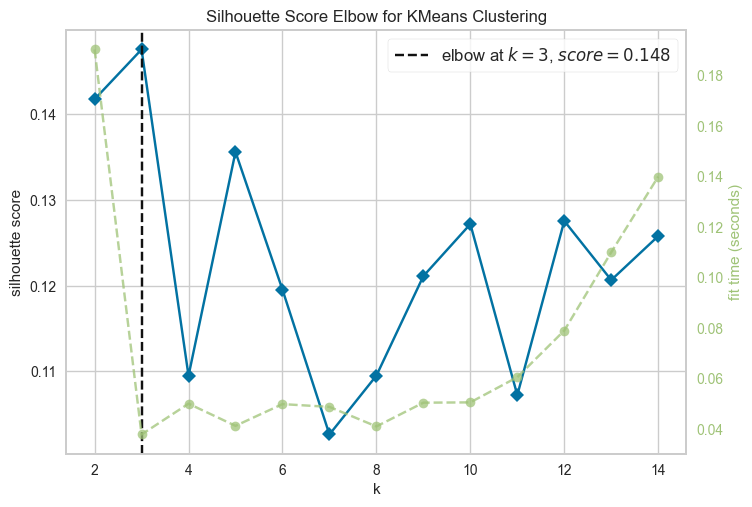

In [12]:
# instanciamos la clase de clustering
df_copia = df_scaled.copy()
modelos = s_clustering.Clustering(df_copia)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

# Encoding alternativo

In [13]:
df_ventas

,Order_Date,Ship_Date,Ship_Mode,Segment,Market,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,2012-07-31,2012-07-31,Same Day,Consumer,US,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,Corporate,APAC,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,Consumer,APAC,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,2013-01-28,2013-01-30,First Class,Home Office,EU,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,2013-11-05,2013-11-06,Same Day,Consumer,Africa,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Corporate,APAC,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,2014-06-20,2014-06-24,Standard Class,Consumer,US,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,2013-12-02,2013-12-02,Same Day,Home Office,US,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,2012-02-18,2012-02-22,Standard Class,Home Office,LATAM,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [14]:
def target_encoding_multiple(df, columns, target_column):
    for column in columns:
        encoder = TargetEncoder(cols=[column])
        df[f'{column}_target'] = encoder.fit_transform(df[column], df[target_column])
    return df

In [15]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

# Copiar el DataFrame original
df_limpio2 = df_ventas.copy()
df_limpio2.drop(columns = ["Order_Date","Ship_Date","Product_Name"],inplace= True)

# Seleccionar columnas categóricas
cols_cat = df_limpio2.select_dtypes(include="O").columns.tolist()

# Columnas para aplicar Ordinal Encoding
cols_ordinal = ["Ship_Mode", "Order_Priority"]

df_limpio2["Discount"] = df_limpio2["Discount"]*10
# Filtrar columnas para Target Encoding
cols_target = [col for col in cols_cat if col not in cols_ordinal]

# Aplicar Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df_limpio2[cols_ordinal] = ordinal_encoder.fit_transform(df_limpio2[cols_ordinal])

# Aplicar Target Encoding
df_encoded2 = target_encoding_multiple(df_limpio2, cols_target, target_column="Sales")

# Mostrar el DataFrame resultante
df_encoded2.head()


,Ship_Mode,Segment,Market,Sub-Category,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Segment_target,Market_target,Sub-Category_target
0,1.0,Consumer,US,Accessories,2309.650,7,0.0,762.1845,933.57,0.0,245.416299,229.858001,243.654315
1,2.0,Corporate,APAC,Chairs,3709.395,9,1.0,-288.7650,923.63,0.0,247.890176,325.917481,437.298126
2,0.0,Consumer,APAC,Phones,5175.171,9,1.0,919.9710,915.49,3.0,245.416299,325.917481,508.437337
3,0.0,Home Office,EU,Phones,2892.510,5,1.0,-96.5400,910.16,3.0,247.228403,293.808906,508.437337
4,1.0,Consumer,Africa,Copiers,2832.960,8,0.0,311.5200,903.04,0.0,245.416299,170.868370,679.008670


In [16]:
df_limpio2.drop(columns = cols_cat,inplace= True)

Hemos hecho la prueba con el nuevo Encoding y da mejores métricas (Silhouette = 0,41, 2 clusters). Vamos a probar un robust Scaler antes de tratar outliers

# Scaling alternativo

Claramente los outliers influyen muy intensamente en el Clustering. No los trataremos, pero mantendremos un robust scaling. Vamos a probar con tres clusters

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_encoded2)

# Crear un nuevo DataFrame con los valores escalados
df_scaled2 = pd.DataFrame(scaled_data, columns=df_encoded2.columns)

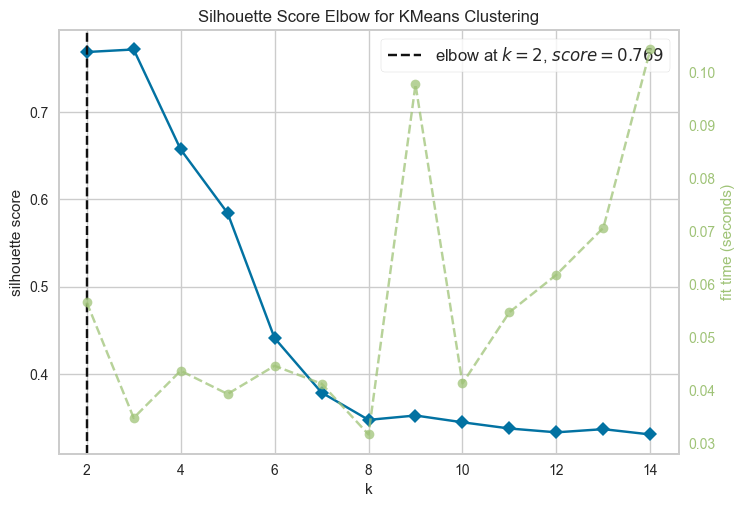

In [18]:
# instanciamos la clase de clustering
df_copia2 = df_scaled2.copy()
modelos = s_clustering.Clustering(df_copia2)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
km_fit = kmeans.fit(df_copia2)
labels = km_fit.labels_
df_copia2["clusters_kmeans"] = labels.astype(str)


In [20]:
df_copia2

,Sales,Quantity,Discount,Profit,Shipping_Cost,Segment_target,Market_target,Sub-Category_target,clusters_kmeans
0,10.098283,1.333333,0.0,20.454890,42.389194,0.000000,0.000000,0.336874,1
1,16.452253,2.000000,0.5,-8.095762,41.934066,1.000000,1.149992,0.871484,1
2,23.105962,2.000000,0.5,24.741402,41.561355,0.000000,1.149992,1.067885,1
3,12.744104,0.666667,0.5,-2.873676,41.317308,0.732496,0.765599,1.067885,1
4,12.473784,1.666667,0.0,8.211899,40.991300,0.000000,-0.706204,1.538797,1
...,...,...,...,...,...,...,...,...,...
51285,-0.090574,0.666667,0.0,-0.128769,-0.356227,1.000000,1.149992,-0.240840,0
51286,-0.384072,-0.666667,4.0,-0.281174,-0.356227,0.000000,0.000000,1.254701,0
51287,-0.282045,0.000000,0.0,0.054083,-0.356227,0.732496,0.000000,-0.142034,0
51288,-0.325078,-0.333333,0.0,-0.185819,-0.356685,0.732496,-0.234401,-0.128516,0


La separación no es muy buena. Parece que la variable de mayor importancia es profit. Vamos a darle otra vuelta al encoding.

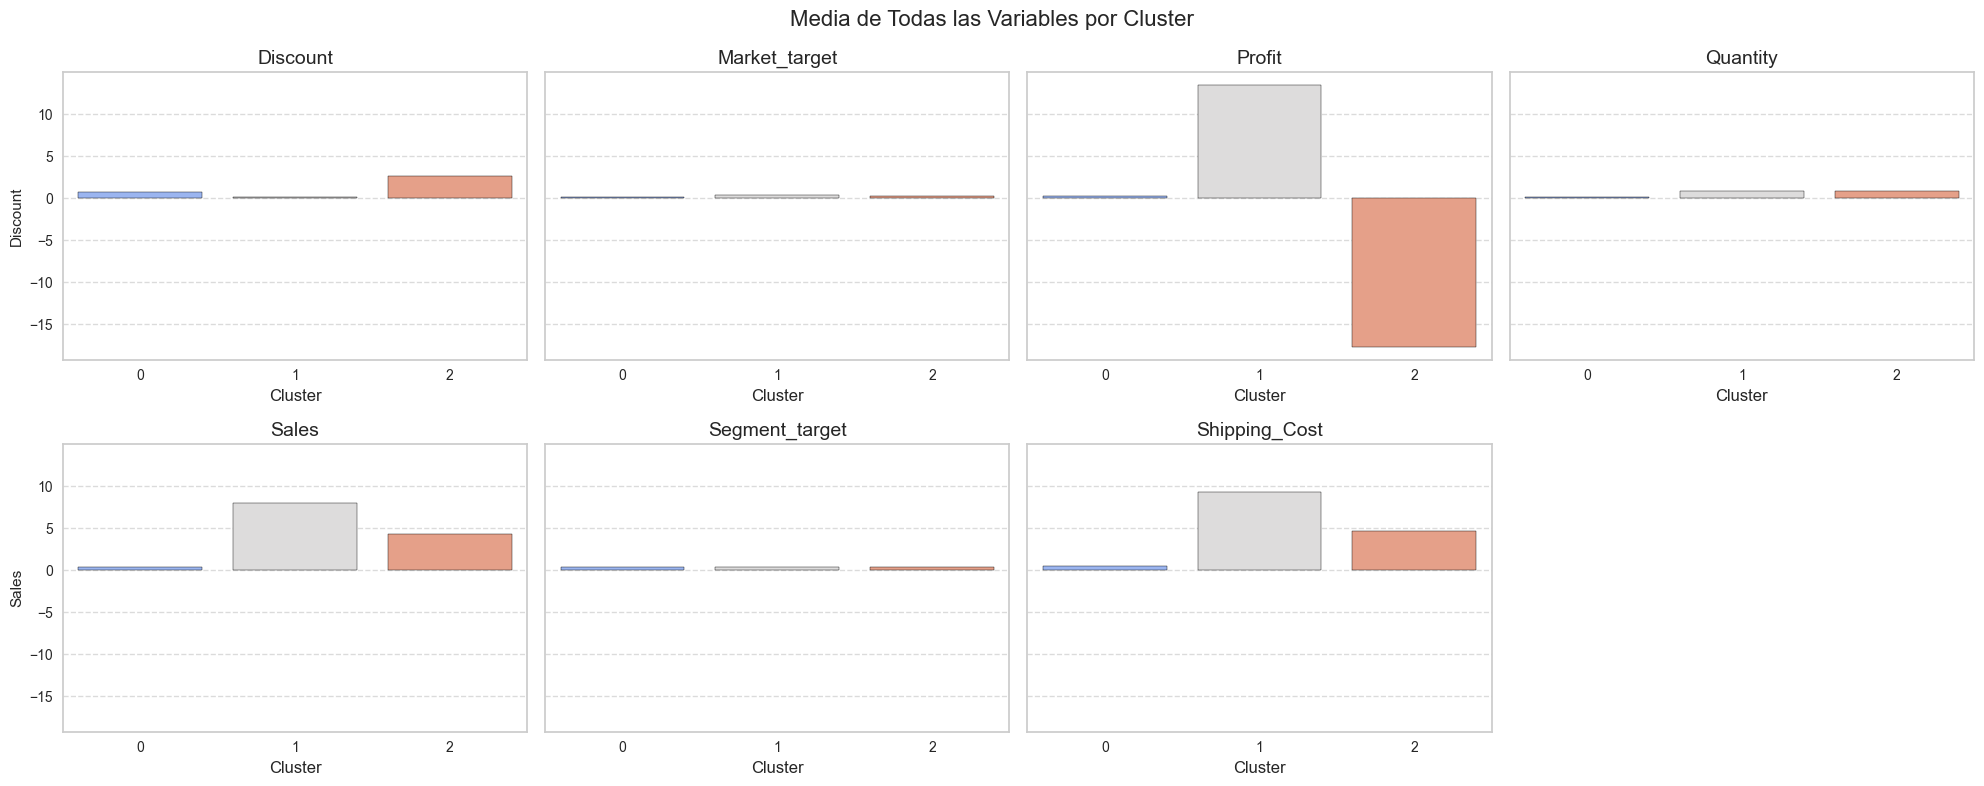

In [21]:
df_kmeans = df_copia2.copy()
# Seleccionar todas las columnas excepto 'country' y agrupar por 'cluster'
columns_to_include = df_kmeans.columns  # Excluye 'country'
variables = columns_to_include.difference(['clusters_kmeans'])  # Variables numéricas
cluster_means = df_kmeans.groupby('clusters_kmeans')[variables].mean().reset_index()

# Crear el subplot dinámicamente
num_vars = len(variables)
fig, axes = plt.subplots(nrows = 2, ncols = math.ceil(num_vars/ 2), figsize=(20,8), sharey=True)
axes = axes.flat
# Generar un barplot para cada variable en un subplot
for i, variable in enumerate(variables):
    sns.barplot(
        data=cluster_means,
        x='clusters_kmeans',
        y=variable,
        ax=axes[i],
        palette='coolwarm',
        edgecolor='black'
    )
    axes[i].set_title(f'{variable}', fontsize=14)
    axes[i].set_xlabel('Cluster', fontsize=12)

    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.delaxes(axes[-1])
# Título general del gráfico
fig.suptitle('Media de Todas las Variables por Cluster', fontsize=16)
plt.tight_layout()
plt.show()

Vamos a hacer una prueba con dbscan antes de eliminar outliers, pues las métricas son buenas

In [22]:
df_dbscan = df_scaled2.copy()
modelos = s_clustering.Clustering(df_scaled2)
modelos.modelo_dbscan(df_dbscan)

eps: 0.5, min_samples: 3, silhouette: -0.21440653972559318
eps: 0.5, min_samples: 2, silhouette: -0.23845042710224928
eps: 0.5, min_samples: 1, silhouette: -0.1271840759030514
eps: 1.0, min_samples: 3, silhouette: -0.006584304395773475
eps: 1.0, min_samples: 2, silhouette: -0.09307845593366908
eps: 1.0, min_samples: 1, silhouette: -0.1858669861564514
eps: 1.5, min_samples: 3, silhouette: 0.42721916078018635
eps: 1.5, min_samples: 2, silhouette: 0.2324233661646222
eps: 1.5, min_samples: 1, silhouette: 0.06906743087742204


,Sales,Quantity,Discount,Profit,Shipping_Cost,Segment_target,Market_target,Sub-Category_target,clusters_dbscan
0,10.098283,1.333333,0.0,20.454890,42.389194,0.000000,0.000000,0.336874,-1
1,16.452253,2.000000,0.5,-8.095762,41.934066,1.000000,1.149992,0.871484,-1
2,23.105962,2.000000,0.5,24.741402,41.561355,0.000000,1.149992,1.067885,-1
3,12.744104,0.666667,0.5,-2.873676,41.317308,0.732496,0.765599,1.067885,-1
4,12.473784,1.666667,0.0,8.211899,40.991300,0.000000,-0.706204,1.538797,-1
...,...,...,...,...,...,...,...,...,...
51285,-0.090574,0.666667,0.0,-0.128769,-0.356227,1.000000,1.149992,-0.240840,11
51286,-0.384072,-0.666667,4.0,-0.281174,-0.356227,0.000000,0.000000,1.254701,11
51287,-0.282045,0.000000,0.0,0.054083,-0.356227,0.732496,0.000000,-0.142034,11
51288,-0.325078,-0.333333,0.0,-0.185819,-0.356685,0.732496,-0.234401,-0.128516,11


El silhouette es bueno, pero no D-B. Claramente hay un cluster "Cajón desastre" y hay muchos clusters como para sacar conclusiones. Volvemos a probar. Esta vez eliminamos market_target y segment_target

In [24]:
modelos.calcular_metricas(labels = labels)

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.771972,0.728098,48664


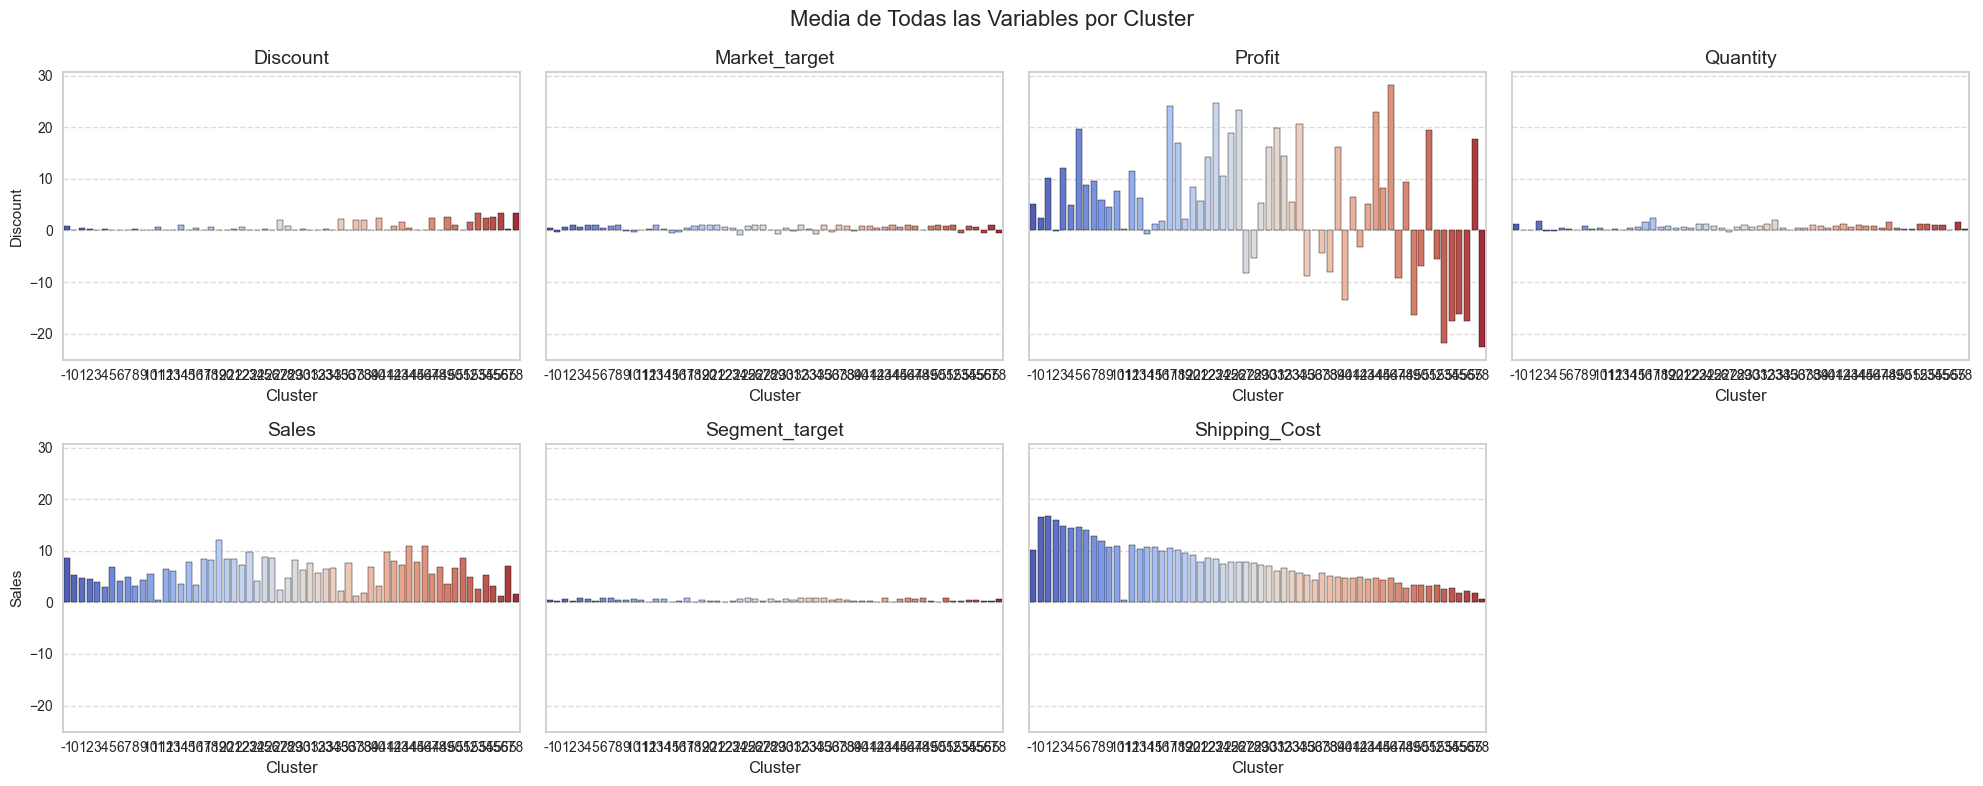

In [26]:
df_kmeans = df_dbscan.copy()
# Seleccionar todas las columnas excepto 'country' y agrupar por 'cluster'
columns_to_include = df_kmeans.columns  # Excluye 'country'
variables = columns_to_include.difference(['clusters_dbscan'])  # Variables numéricas
cluster_means = df_kmeans.groupby('clusters_dbscan')[variables].mean().reset_index()

# Crear el subplot dinámicamente
num_vars = len(variables)
fig, axes = plt.subplots(nrows = 2, ncols = math.ceil(num_vars/ 2), figsize=(20,8), sharey=True)
axes = axes.flat
# Generar un barplot para cada variable en un subplot
for i, variable in enumerate(variables):
    sns.barplot(
        data=cluster_means,
        x='clusters_dbscan',
        y=variable,
        ax=axes[i],
        palette='coolwarm',
        edgecolor='black'
    )
    axes[i].set_title(f'{variable}', fontsize=14)
    axes[i].set_xlabel('Cluster', fontsize=12)

    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.delaxes(axes[-1])
# Título general del gráfico
fig.suptitle('Media de Todas las Variables por Cluster', fontsize=16)
plt.tight_layout()
plt.show()

Vamos a probar eliminando outliers y usando k-mans

In [28]:
df_ventas.head()

,Order_Date,Ship_Date,Ship_Mode,Segment,Market,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,2012-07-31,2012-07-31,Same Day,Consumer,US,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,Corporate,APAC,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,Consumer,APAC,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,2013-01-28,2013-01-30,First Class,Home Office,EU,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,2013-11-05,2013-11-06,Same Day,Consumer,Africa,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
out = s_eda.GestionOutliersMultivariados(df_ventas)
out.detectar_outliers_lof()